## Task 1 

Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

***Strategy***
- Look into the arr_delay and determine the distribution
- Try using descriptive statistics and LOF as a means to treat the outliers

---

**INPUT**: data with nulls removed

---

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("flight_sample_small.csv")

In [5]:
df = pd.read_csv("flight_sample_large.csv")

Looking at the arrival delay descriptive statistics

In [6]:
df.arr_delay.describe()

count    5.000000e+06
mean     5.383032e+00
std      4.934533e+01
min     -2.600000e+02
25%     -1.500000e+01
50%     -6.000000e+00
75%      7.000000e+00
max      2.973000e+03
Name: arr_delay, dtype: float64

Let's look at a graph

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

Text(0.5, 1.0, 'Delays (no outlier treatment)')

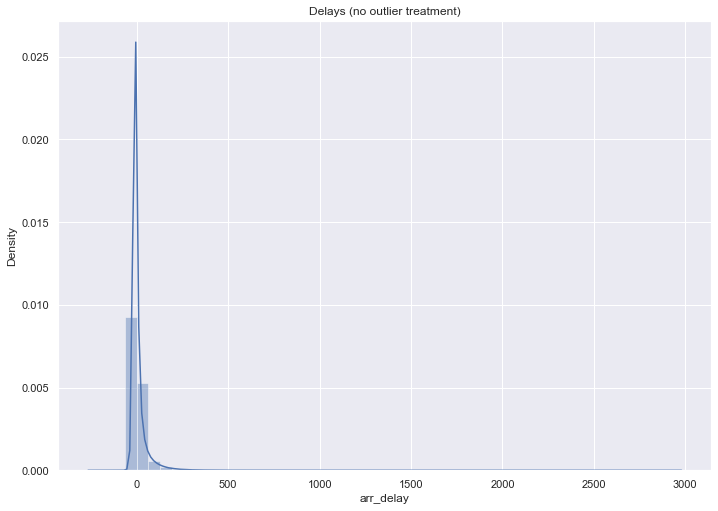

In [8]:
sns.distplot(df.arr_delay).set_title("Delays (no outlier treatment)")

From the graph we can see there is a large pull of outliers we will consider 2 options for outlier treatment
1. Descriptive Statistics
2. LOF

*Begining with Descriptive Statistics:*
- these state anything outside of 1.5XIQR is considered an outlier
- the issue lies in that the outliers are influincing the descriptive statistics

In [9]:
#find the IQR of our data
IQR = df.arr_delay.describe()[6] - df.arr_delay.describe()[4] 
min_delay = df.arr_delay.describe()[1]-1.5*IQR
max_delay = df.arr_delay.describe()[1]+1.5*IQR
print(min_delay, max_delay)

-27.6169676 38.3830324


In [10]:
# we will filter our data to only include the delays within this range
df_iqr = df[df.arr_delay <= max_delay]
df_iqr = df_iqr[df_iqr.arr_delay >= min_delay]

In [11]:
df_iqr.arr_delay.describe()

count    4.298564e+06
mean    -4.491252e+00
std      1.369894e+01
min     -2.700000e+01
25%     -1.400000e+01
50%     -7.000000e+00
75%      2.000000e+00
max      3.800000e+01
Name: arr_delay, dtype: float64

In [12]:
#determine how much of the data was treated as outliers
print("The percentage of observations treated as outliers is: ",(df.shape[0]-df_iqr.shape[0])/df.shape[0]*100)

The percentage of observations treated as outliers is:  14.02872


Text(0.5, 1.0, 'Delays (IQR Treatment)')

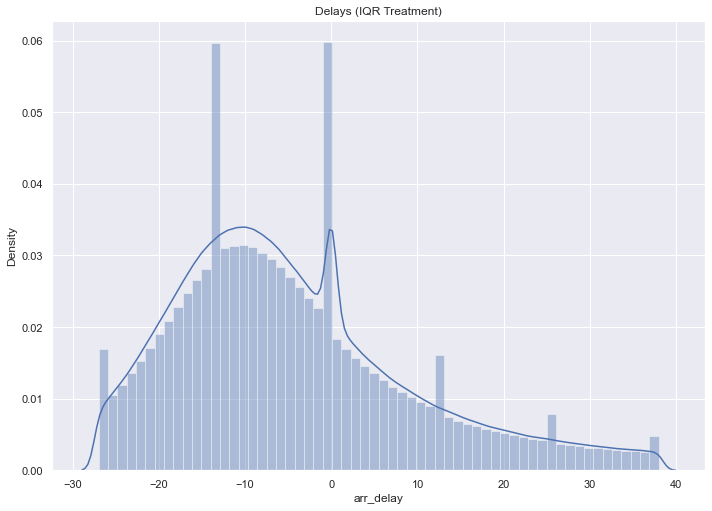

In [13]:
#view as a plot
sns.distplot(df_iqr.arr_delay, bins=60).set_title("Delays (IQR Treatment)")

In [13]:
df_iqr.to_csv("iqr.csv", index=False)
df_iqr.arr_delay.to_csv("iqr_taskone.csv", index=False)

*Local Outlier Factor*
- use unsupervised learning to determine the outliers

In [14]:
from sklearn.neighbors import LocalOutlierFactor

In [15]:
X = df.arr_delay.values.reshape(-1,1)

In [16]:
clf = LocalOutlierFactor(n_neighbors=35)

In [ ]:
clf.fit(X)

In [11]:
X_scores = clf.negative_outlier_factor_

In [32]:
def check_lof_drop (col1, col2):
    """Used to determine if the negative outlier factor is within the threshold"""
    threshold = -1.25
    if col2 < threshold:
        return 1
    return 0

In [19]:
#determine the boundaries on either side
test = pd.DataFrame(X, X_scores)
test.reset_index(level=0, inplace=True)
test = test.rename(columns = {'index' : 'negative_outlier_factor', 0 : 'arr_delay'})

test["drop_lof"] = test.apply(lambda x: check_lof_drop(x.arr_delay, x.negative_outlier_factor), axis=1)

In [4]:
df_LOF = df[df.arr_delay <= 266]
df_LOF = df_LOF[df_LOF.arr_delay >= -58]

In [5]:
df_LOF.arr_delay.describe()

count    4.975908e+06
mean     3.291084e+00
std      3.495702e+01
min     -5.800000e+01
25%     -1.500000e+01
50%     -6.000000e+00
75%      7.000000e+00
max      2.660000e+02
Name: arr_delay, dtype: float64

In [6]:
#determine how much of the data was treated as outliers
print("The percentage of observations treated as outliers is: ",(df.shape[0]-df_LOF.shape[0])/df.shape[0]*100)

The percentage of observations treated as outliers is:  0.48183999999999994


Text(0.5, 1.0, 'Delays (LOF)')

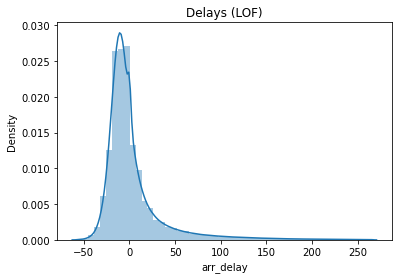

In [7]:
sns.distplot(df_LOF.arr_delay).set_title("Delays (LOF)")

In [8]:
df_LOF.to_csv("lof.csv", index=False)
df_LOF.arr_delay.to_csv("lof_taskone.csv", index=False)